In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x, c):
    
    return 1 / (1 + np.exp(-c*(x-0.5)))

In [3]:
def entropy(x):
    
    return -x * np.log(x) - (1-x) * np.log(1-x)

In [4]:
def area(c):
    
    return (np.log((1+np.exp(c/2))/2))/c

In [5]:
def error(x, c):
    
    return -c * np.log(1/x - 1)

In [14]:
cs = np.arange(0.01, 1, 0.01)
x = np.arange(0.01, 1, 0.01)

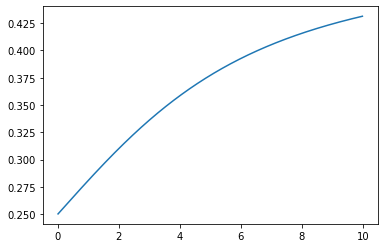

In [15]:
plt.plot(cs, area(cs))

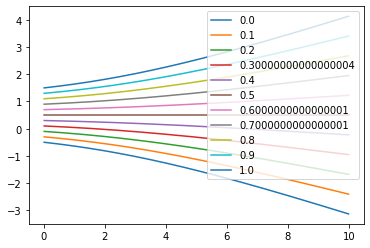

In [16]:
a = area(cs)

for r in np.arange(0, 1.1, 0.1):
    plt.plot(cs, (r - a)/(1 - 2*a), label=r)

plt.legend()

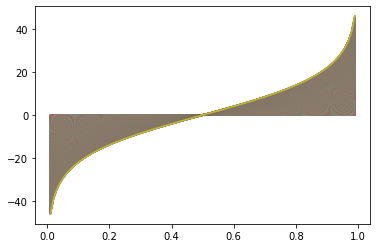

In [17]:
for c in cs:
    plt.plot(x, error(x, c))

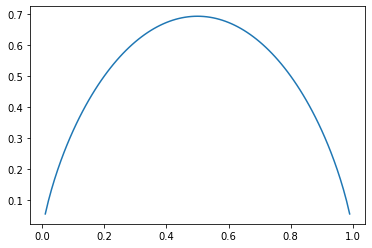

In [18]:
plt.plot(x, entropy(x))

-0.32573900920385723


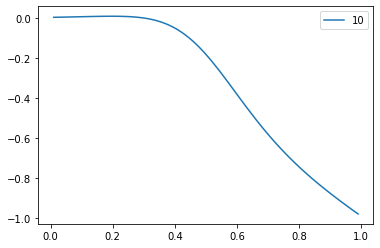

In [42]:
for c in [10]:
    plt.plot(x, -sigmoid(x, c)* x + entropy(sigmoid(x, c))/c, label=c)
# plt.yscale("log")
plt.legend()
print(sum((-sigmoid(x, c)* x + entropy(sigmoid(x, c))/c))/len(x))

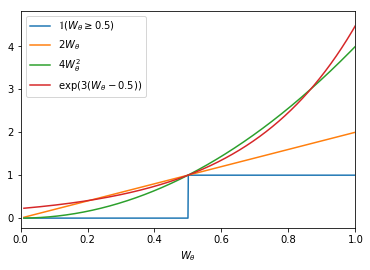

In [36]:
x = np.arange(0.01, 1.01, 0.001)

plt.plot(x, [0 if i <= 0.5 else 1 for i in x], label=r'$\mathbb{1}(W_{\theta} \geq 0.5)$')
plt.plot(x, 2*x, label=r'$2W_{\theta}$')
plt.plot(x, 4*x**2, label=r'$4W_{\theta}^2$')
plt.plot(x, np.exp(3*(x-0.5)), label=r'$\exp(3(W_{\theta}-0.5))$')

plt.xlabel(r'$W_{\theta}$')
plt.xlim(0, 1)
plt.legend()

plt.savefig("moments.pdf", bbox="tight")

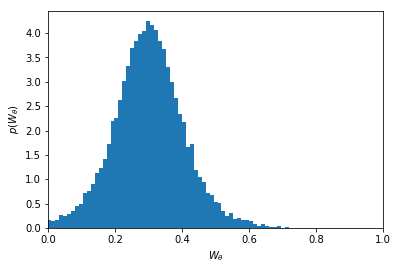

In [54]:
loc, scale = 0.3, 0.06
s = np.random.logistic(loc, scale, 10000)

count, bins, ignored = plt.hist(s, bins=100, density=True)

plt.xlabel(r'$W_{\theta}$')
plt.ylabel(r'$p(W_{\theta})$')
plt.xlim(0, 1)

plt.savefig("pdf.pdf", bbox="tight")

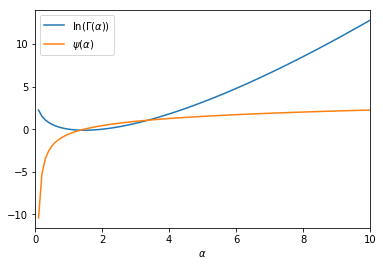

In [78]:
from scipy.special import gamma, digamma, polygamma

a = np.arange(0, 10.1, 0.1)

plt.plot(a, np.log(gamma(a)), label=r'$\ln(\Gamma(\alpha))$')
plt.plot(a, digamma(a), label=r'$\psi(\alpha)$')
# plt.plot(a, polygamma(1, a), label=r'$\psi\'(\alpha)$')
plt.legend()
plt.xlim(0, 10)
plt.xlabel(r'$\alpha$')
# plt.yscale("log")
plt.savefig("gamma.pdf", bbox="tight")